# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'> Exoplanetas são planetas localizados fora do nosso Sistema Solar e sua descoberta revela uma diversidade incrível de tipos planetários. A utilização de algoritmos de classificação é essencial para distinguir entre esses diferentes tipos de exoplanetas, como gigantes gasosos, planetas neutonianos e super-Terras. Esses algoritmos analisam dados astronômicos, como tamanho, massa e órbita, classificando os planetas com precisão. Isso permite uma melhor compreensão da formação e evolução de sistemas planetários, além de identificar exoplanetas com características que possam indicar potencial para abrigar vida.

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'> Neste sentido, o objetivo deste projeto é encontrar o modelo com melhor acurácia para classificar os tipos de exoplanetas encontrados com os dados da NASA.</p> 

#### __Fonte dos dados__:  https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets

### Dados:
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    
- __distance__: Distância do planeta para Terra em anos-luz.

- __stellar_magnitude__: Brilho do planeta, quanto mais brilhante o planeta, menor número é atribuído ao mesmo.

- __planet_type__: Tipo de planeta, esses tipos são derivados dos planetas do nosso sistema solar.

- __discovery_year__: Ano de descobrimento do planeta.

- __mass_multiplier__: Multiplicador de massa do planeta com planeta 'mass_wrt'.

- __mass_wrt__: Massa do planeta em comparação com a massa dos planetas do nosso sistema solar.

- __radius_multiplier__: Multiplicador de raio do planeta com planeta 'radius_wrt'.

- __radius_wrt__: Raio do planeta em comparação com o raio dos planetas do nosso sistema solar.

- __orbital_radius__: Raio orbital dos planetas orbitando seu sol (em UA).

- __orbital_period__: Tempo em anos que esses planetas levam para completar 1 órbita de sua estrela.

- __eccentricity__: Excentricidade

- __detection_method__: Método usado pela NASA pra encontrar o exoplaneta. 
</ul>

### Importando as bibliotecas e lendo a base de dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('exoplanets.csv')

In [3]:
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


### Visualizando dados faltantes, duplicados e os valores únicos de cada coluna

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


Aqui vemos que algumas colunas possuem dados nulos e precisam ser tratadas. Temos também algumas colunas categóricas e outras númericas. Antes do tratamento vamos verificar se existem dados duplicados.

In [5]:
df.duplicated().sum()

0

Após isso, vou simplesmente deletar os dados nulos.

In [6]:
df.dropna(inplace = True)

Verificando se de fato foram deletados:

In [7]:
df.isna().sum().sum()

0

In [8]:
df.shape

(4765, 13)

Visualizando os valores únicos de cada coluna

In [9]:
unique_value_count = {}

for i in df.columns:
    unique_value_count[i] =  df[i].nunique()

pd.DataFrame(unique_value_count , index=['unique value count']).T

,unique value count
name,4765
distance,2363
stellar_magnitude,2735
planet_type,4
discovery_year,29
mass_multiplier,1631
mass_wrt,2
radius_multiplier,969
radius_wrt,2
orbital_radius,2744


Vemos que não vamos utilizar a coluna 'name' para treinar nosso modelo, logo, vou deletar essa coluna da base de dados.

In [10]:
df.drop('name', axis = 1, inplace = True)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

### Estatística descritiva

In [11]:
df.describe().round(3)

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
count,4765.000,4765.000,4765.000,4765.000,4765.000,4765.000,4765.000,4765.000
mean,1796.386,12.693,2015.484,6.425,1.014,6.623,480.023,0.068
std,1813.067,3.151,4.230,13.393,0.609,140.540,17542.984,0.145
min,4.000,0.872,1995.000,0.028,0.200,0.006,0.001,-0.520
25%,358.000,10.883,2014.000,1.790,0.317,0.052,0.013,0.000
50%,1386.000,13.629,2016.000,4.190,1.120,0.099,0.033,0.000
75%,2741.000,15.061,2018.000,8.050,1.420,0.243,0.124,0.068
max,27727.000,44.610,2023.000,752.000,6.900,7506.000,1101369.900,0.950


Vemos aqui um valor inconsistente, pois a excentricidade não pode ser negativa, uma vez que é a razão entre duas distâncias, e portanto, um número não negativo. Esse é um outro tratamento que precisaremos fazer na base de dados.


Antes desse tratamento, vamos fazer a análise gráfica para as colunas categóricas e numéricas.

### Análise das variáveis categóricas

In [12]:
sns.set_palette('tab10')
sns.set_style('white')

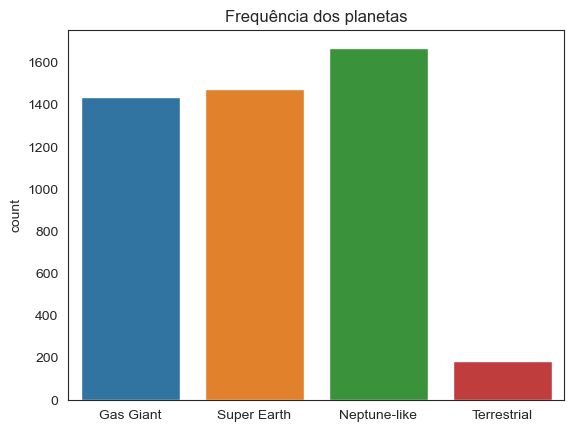

In [13]:
ax = sns.countplot(data = df, x = 'planet_type')
ax.set_title('Frequência dos planetas')
ax.set_xlabel('')
plt.show()

Vemos que temos um número muito menor de planetas tipo terreste do que dos outros tipos. Planetas Netunianos, superterras e gigantes gasosos tem números parecidos.

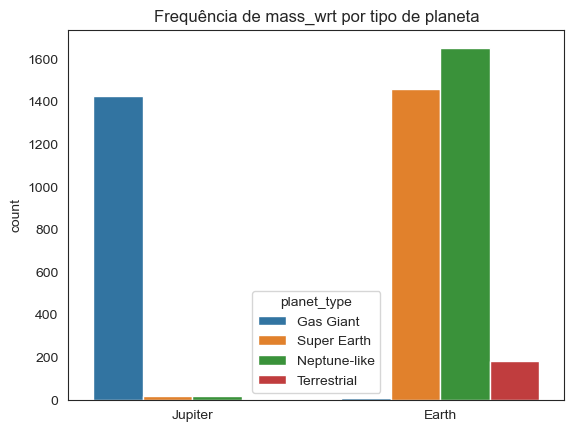

In [14]:
ax = sns.countplot(data = df, x = 'mass_wrt', hue = 'planet_type')
ax.set_title('Frequência de mass_wrt por tipo de planeta')
ax.set_xlabel('')
plt.show()

Majoritariamente os gigantes gasosos possuem massas comparáveis com a do planeta Júpiter. Enquanto superterras, netunianos e terrestres possuem massas comparáveis com a Terra. 

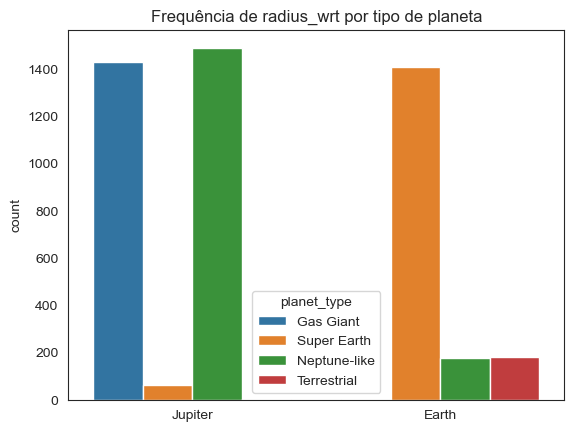

In [15]:
ax = sns.countplot(data = df, x = 'radius_wrt', hue = 'planet_type')
ax.set_title('Frequência de radius_wrt por tipo de planeta')
ax.set_xlabel('')
plt.show()

Com respeito ao raio, vemos que gigantes gasosos possuem raio parecido com Júpiter. Além disso, planetas netunianos possuem, em geral, raio comparável ao de Júpiter apesar de alguns deles aparecem com o raio comparável ao da Terra. Já superterras em grande maioria tem raio parecido com a Terra, assim como os terrestres.

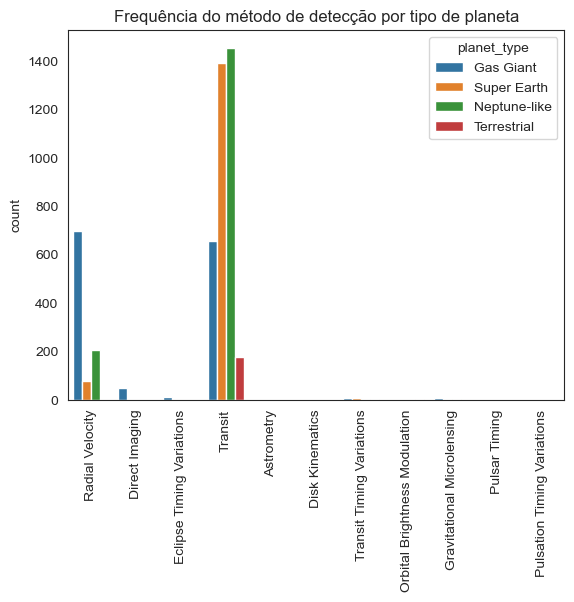

In [16]:
ax = sns.countplot(data = df, x = 'detection_method', hue = 'planet_type')
ax.set_title('Frequência do método de detecção por tipo de planeta')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

A maior parte das detecções são feitas pelo método 'Transit', seguido do método 'Radial Velocity'. Com respeito a esses métodos, vemos que o 'Radial Velocit' detectou um número muito maior de exoplanetas do tipo gigantes gasosos do que dos outros tipos. Por outro lado, o método 'Transit' detectou um número maior dos tipo netunianos e superterras. Outro ponto é que esse método é capaz de detectar planetas do tipo terrestes.

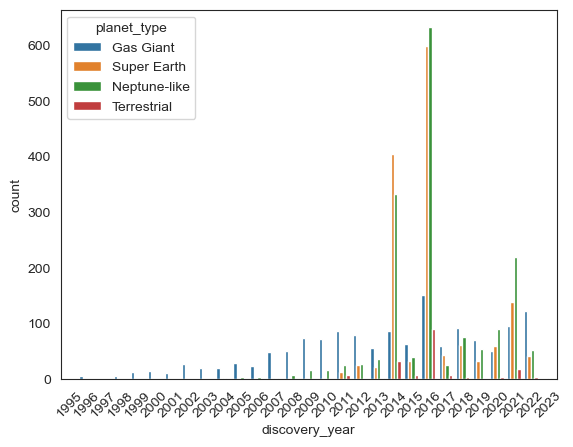

In [17]:
ax = sns.countplot(data = df, x = 'discovery_year', hue = 'planet_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

Vemos que o ano com maior número de descobertas é 2016, seguido de 2015 e 2021. Outro ponto é que os planetas do tipo gigantes gasosos vem sendo detectados desde a decada de 90, enquanto os outros tipos começam a ser detectados pós anos 2000.

### Análise das variáveis numéricas

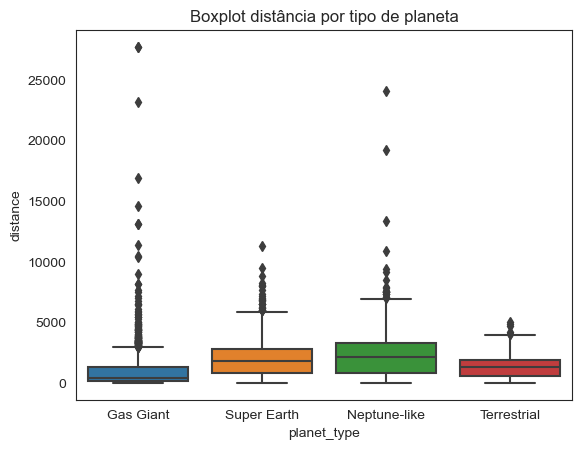

In [18]:
ax = sns.boxplot(data = df, x = 'planet_type', y = 'distance')
ax.set_title('Boxplot distância por tipo de planeta')
plt.show()

Planetas netunianos parecem ter uma distância um poucos maior que superterras, enquanto gigantes gasosos parece ter a menor distância. Embora a possível presença de outliers, como são valores possíveis de serem obtidos na realidade, irei optar por manter os mesmos na base de dados.

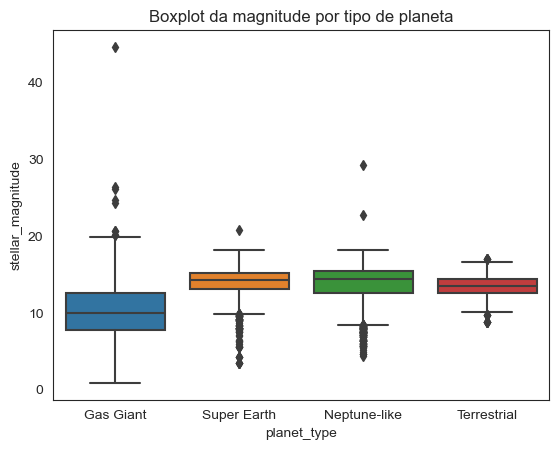

In [19]:
ax = sns.boxplot(data = df, x = 'planet_type', y = 'stellar_magnitude')
ax.set_title('Boxplot da magnitude por tipo de planeta')
plt.show()

Planetas netunianos e superterras parecem ter a maior magnitude estelar, enquanto gigantes gasosos possuem a menor. Embora a possível presença de outliers, como são valores possíveis irei optar por manter os mesmos na base de dados.

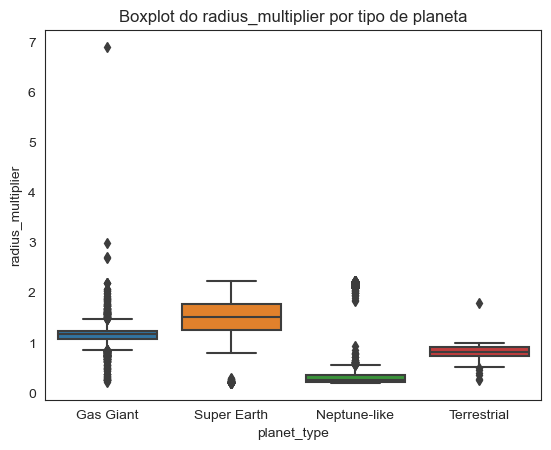

In [20]:
ax = sns.boxplot(data = df, x = 'planet_type', y = 'radius_multiplier')
ax.set_title('Boxplot do radius_multiplier por tipo de planeta')
plt.show()

Superterras e gigantes gasoso tem o maior valor de multiplicador de raio em relação aos planetas netunianos. Essa é uma característica que mostra uma grande diferença de acordo com o tipo de exoplaneta. Novamente, irei manter os outliers.

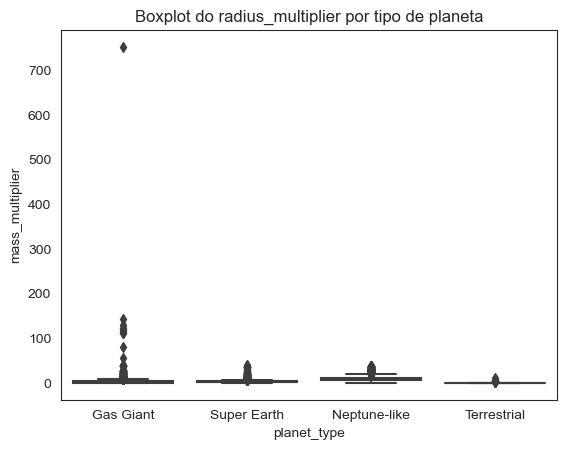

In [21]:
ax = sns.boxplot(data = df, x = 'planet_type', y = 'mass_multiplier')
ax.set_title('Boxplot do radius_multiplier por tipo de planeta')
plt.show()

O valor 752 para gigantes gasosos distorce muito o boxplot dificultando a análise. Apesar disso, vou manter os outliers nesse caso.

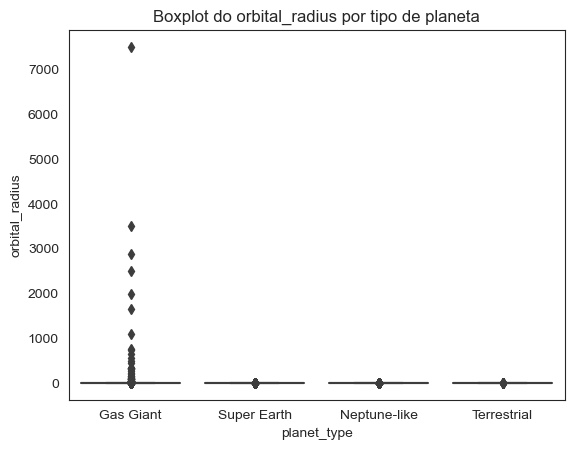

In [22]:
ax = sns.boxplot(data = df, x = 'planet_type', y = 'orbital_radius')
ax.set_title('Boxplot do orbital_radius por tipo de planeta')
plt.show()

Assim como no caso anterior temos um boxplot muito distorcido e isso dificulta a análise. Apesar disso, vou manter os outliers nesse caso.

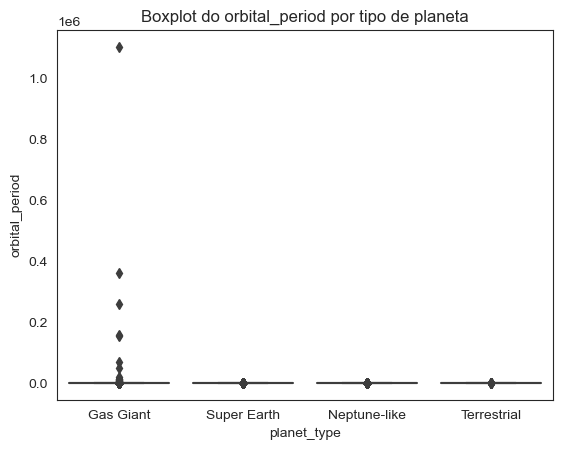

In [23]:
ax = sns.boxplot(data = df, x = 'planet_type', y = 'orbital_period')
ax.set_title('Boxplot do orbital_period por tipo de planeta')
plt.show()

Assim como no caso anterior temos um boxplot muito distorcido e isso dificulta a análise. Apesar disso, vou manter os outliers nesse caso.

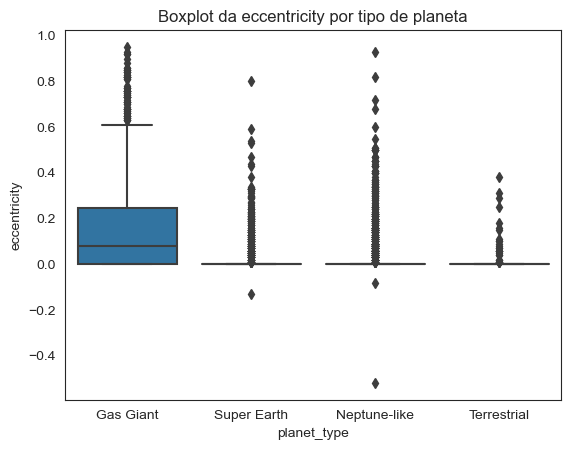

In [24]:
ax = sns.boxplot(data = df, x = 'planet_type', y = 'eccentricity')
ax.set_title('Boxplot da eccentricity por tipo de planeta')
plt.show()

Nesse caso temos valores incosistentes. Como comentado anteriormente, valores de excentricidade negativos não existem. Assim, esses outliers irão ser tratados. Para isso, vamos simplesmente filtrar esses valores do seguinte modo:

In [25]:
df = df[df['eccentricity'] >= 0]

Logo, visualizando o mesmo boxplot:

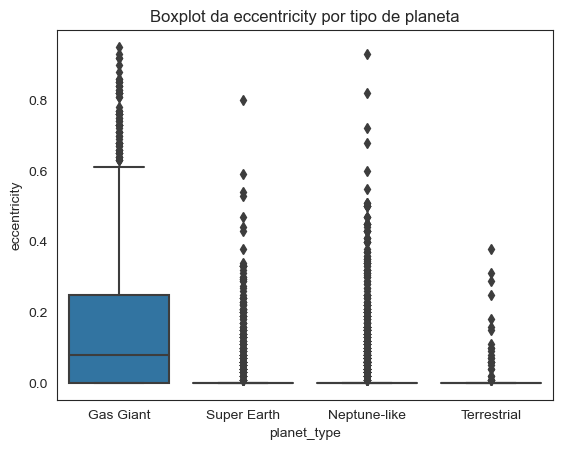

In [26]:
ax = sns.boxplot(data = df, x = 'planet_type', y = 'eccentricity')
ax.set_title('Boxplot da eccentricity por tipo de planeta')
plt.show()

# <font color='red' style='font-size: 30px;'>Pré-processamento</font>
<hr style='border: 2px solid red;'>

### Utilizando o LabelEncoder, StandardScaler e OneHotEncoder

Como parte do pré-processamento, vamos normalizar os dados através do StandardScaler() e utilizar o OneHotEncoder() e o LabelEncoder() para as variáveis do tipo object. Para isso, primeiramente vamos separar o dataset em X e y.

In [27]:
X = df.drop('planet_type', axis = 1)
y = df['planet_type']

In [28]:
scaler = StandardScaler()
label = LabelEncoder()
one_hot = OneHotEncoder(drop = 'if_binary')

In [29]:
one_hot = make_column_transformer((one_hot, ['mass_wrt', 'radius_wrt', 'detection_method']), remainder = 'passthrough', sparse_threshold = 0)

X = one_hot.fit_transform(X)

Normalizando os dados e utilizando o LabelEncoder:

In [30]:
X = scaler.fit_transform(X)

In [31]:
y = label.fit_transform(y)

Após o LabelEncoder, as classes da variável alvo, ou seja, os exoplanetas vãos ser dados por:

In [32]:
label.inverse_transform([0, 1, 2, 3])

array(['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial'],
      dtype=object)

# <font color='red' style='font-size: 30px;'>Construindo os modelos</font>
<hr style='border: 2px solid red;'>

### Separando os dados em treino e teste

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

### Treinando os modelos

#### Árvore de decisão

In [34]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)

dt.fit(X_train, y_train)

print(f'Acurácia do treino: {dt.score(X_train, y_train)}')
print(f'Acurácia do teste: {dt.score(X_test, y_test)}')

Acurácia do treino: 0.9516951695169517
Acurácia do teste: 0.947515745276417


Além da acurácia é importante verificar se o modelo consegue distinguir bem entre as classes. Uma boa maneira de visualizar isso é através da matriz de confusão. 

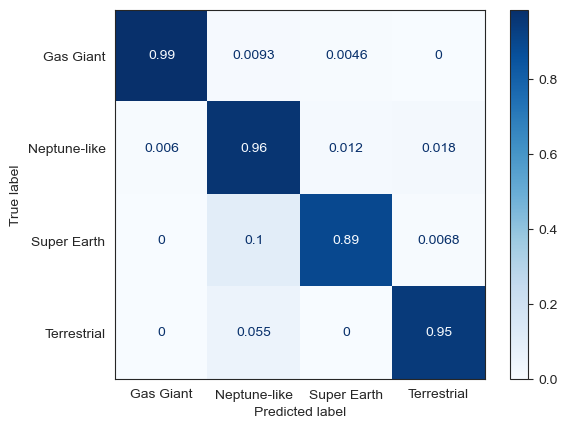

In [35]:

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, normalize='true', cmap='Blues', 
                                      display_labels = ['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial']); 

Vemos que o modelo consegue distinguir bem entre as classes.

Para maior confiabilidade no modelo vamos optar por realizar a validação cruzada:

In [36]:
skf = StratifiedKFold(shuffle = True, random_state = 42)

resultados = cross_validate(dt, X, y, scoring = 'accuracy', cv = skf, 
                            return_train_score = True)

treino_acc= resultados['train_score']
teste_acc = resultados['test_score']

dt_acc = teste_acc.mean()

print("Média da acurácia no treino:", treino_acc.mean())
print("Média da acurácia no teste:", dt_acc)

Média da acurácia no treino: 0.9509658778869496
Média da acurácia no teste: 0.9485488109199608


__*Para os próximos modelos vamos seguir o mesmo caminho*.__

#### Floresta aleatória

In [37]:
rf = RandomForestClassifier(max_depth = 3, random_state = 42)

rf.fit(X_train, y_train)

print(f'Acurácia do treino: {rf.score(X_train, y_train)}')
print(f'Acurácia do teste: {rf.score(X_test, y_test)}')

Acurácia do treino: 0.9057905790579058
Acurácia do teste: 0.9027291812456263


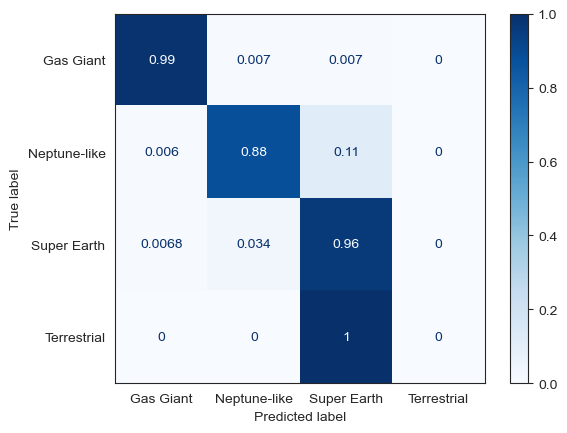

In [38]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, normalize='true', cmap='Blues', 
                                      display_labels = ['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial']); 

Vemos aqui que apesar da boa acurácia, o modelo não é bom para identificar os planetas do tipo terreste. 

Validação cruzada:

In [39]:
skf = StratifiedKFold(shuffle = True, random_state = 42)

resultados = cross_validate(rf, X, y, scoring = 'accuracy', cv = skf, 
                            return_train_score = True)

treino_acc= resultados['train_score']
teste_acc = resultados['test_score']

rf_acc = teste_acc.mean()

print("Média da acurácia no treino:", treino_acc.mean())
print("Média da acurácia no teste:", rf_acc)

Média da acurácia no treino: 0.90581668365227
Média da acurácia no teste: 0.9059211512516864


#### Regressão Logística

In [40]:
lr = LogisticRegression(max_iter = 200, random_state = 42)

lr.fit(X_train, y_train)

print(f'Acurácia do treino: {lr.score(X_train, y_train)}')
print(f'Acurácia do teste: {lr.score(X_test, y_test)}')

Acurácia do treino: 0.9585958595859586
Acurácia do teste: 0.9482155353393982


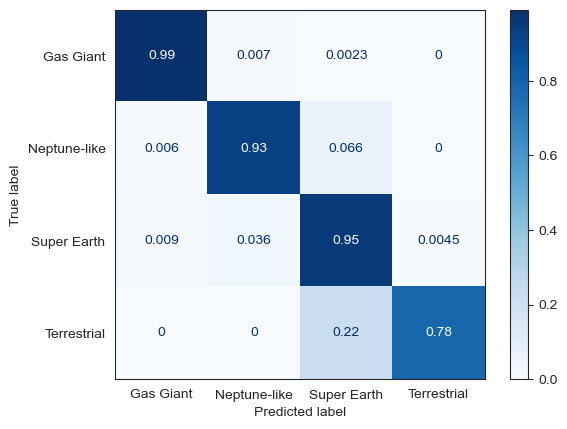

In [41]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, normalize='true', cmap='Blues', 
                                      display_labels = ['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial']); 

Validação cruzada:

In [42]:
skf = StratifiedKFold(shuffle = True, random_state = 42)

resultados = cross_validate(lr, X, y, scoring = 'accuracy', cv = skf, 
                            return_train_score = True)

treino_acc= resultados['train_score']
teste_acc = resultados['test_score']

lr_acc = teste_acc.mean()

print("Média da acurácia no treino:", treino_acc.mean())
print("Média da acurácia no teste:", lr_acc)

Média da acurácia no treino: 0.9577907277211246
Média da acurácia no teste: 0.9561076476760693


#### AdaBoost

In [43]:
ada = AdaBoostClassifier(n_estimators = 50, learning_rate = 1, random_state = 42)

ada.fit(X_train, y_train)

print(f'Acurácia do treino: {ada.score(X_train, y_train)}')
print(f'Acurácia do teste: {ada.score(X_test, y_test)}')

Acurácia do treino: 0.9051905190519052
Acurácia do teste: 0.8992302309307207


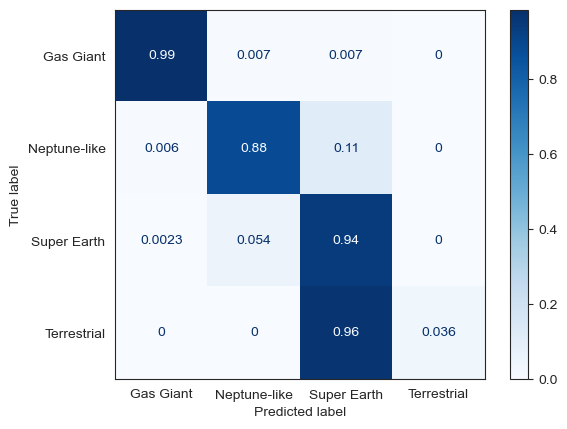

In [44]:
ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test, normalize='true', cmap='Blues', 
                                      display_labels = ['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial']); 

O modelo também não consegue identificar os planetas do tipo terreste.

Validação cruzada:

In [45]:
skf = StratifiedKFold(shuffle = True, random_state = 42)

resultados = cross_validate(ada, X, y, scoring = 'accuracy', cv = skf, 
                            return_train_score = True)

treino_acc= resultados['train_score']
teste_acc = resultados['test_score']

ada_acc = teste_acc.mean()

print("Média da acurácia no treino:", treino_acc.mean())
print("Média da acurácia no teste:", ada_acc)

Média da acurácia no treino: 0.76659493436253
Média da acurácia no teste: 0.767932755473648


#### XGBoost

In [46]:
xg = xgb.XGBClassifier(objective = 'binary:logistic')

xg.fit(X_train, y_train)

print(f'Acurácia do treino: {xg.score(X_train, y_train)}')
print(f'Acurácia do teste: {xg.score(X_test, y_test)}')

Acurácia do treino: 1.0
Acurácia do teste: 0.9860041987403779


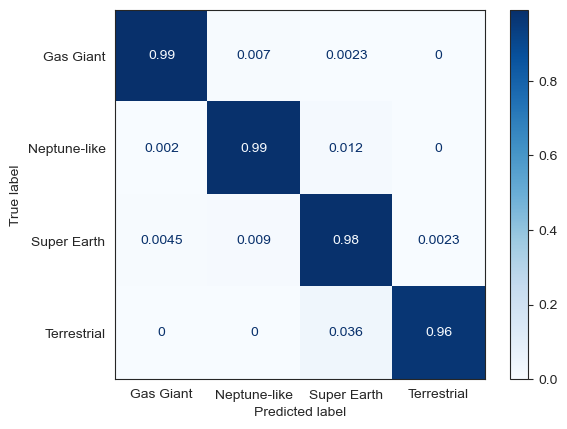

In [47]:
ConfusionMatrixDisplay.from_estimator(xg, X_test, y_test, normalize='true', cmap='Blues', 
                                      display_labels = ['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial']); 

Validação cruzada:

In [48]:
skf = StratifiedKFold(shuffle = True, random_state = 42)

resultados = cross_validate(xg, X, y, scoring = 'accuracy', cv = skf, 
                            return_train_score = True)

treino_acc= resultados['train_score']
teste_acc = resultados['test_score']

xg_acc = teste_acc.mean()

print("Média da acurácia no treino:", treino_acc.mean())
print("Média da acurácia no teste:", xg_acc)

Média da acurácia no treino: 1.0
Média da acurácia no teste: 0.9813089139118396


#### SVC

In [49]:
svm = SVC(kernel='rbf', random_state = 1, C = 2)

svm.fit(X_train, y_train)

print(f'Acurácia do treino: {svm.score(X_train, y_train)}')
print(f'Acurácia do teste: {svm.score(X_test, y_test)}')

Acurácia do treino: 0.9405940594059405
Acurácia do teste: 0.9356193142057383


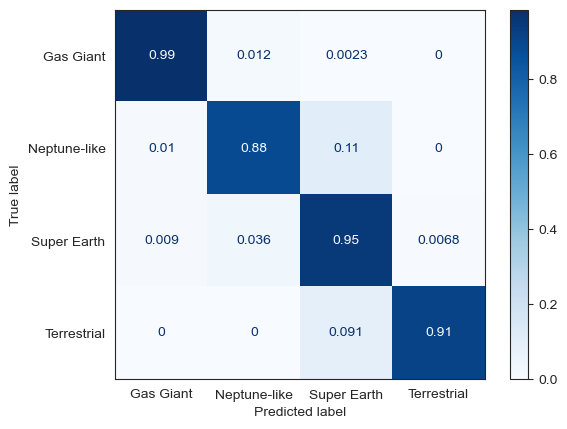

In [50]:
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, normalize='true', cmap='Blues', 
                                      display_labels = ['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial']); 

Validação cruzada:

In [51]:
skf = StratifiedKFold(shuffle = True, random_state = 42)

resultados = cross_validate(svm, X, y, scoring = 'accuracy', cv = skf, 
                            return_train_score = True)

treino_acc= resultados['train_score']
teste_acc = resultados['test_score']

svm_acc = teste_acc.mean()

print("Média da acurácia no treino:", treino_acc.mean())
print("Média da acurácia no teste:", svm_acc)

Média da acurácia no treino: 0.9484978869633943
Média da acurácia no teste: 0.943300237198762


#### KNN

In [64]:

knn = KNeighborsClassifier(n_neighbors = 7, metric =  'minkowski', p = 1)

knn.fit(X_train, y_train)

print(f'Acurácia do treino: {knn.score(X_train, y_train)}')
print(f'Acurácia do teste: {knn.score(X_test, y_test)}')

Acurácia do treino: 0.9594959495949595
Acurácia do teste: 0.9538138558432471


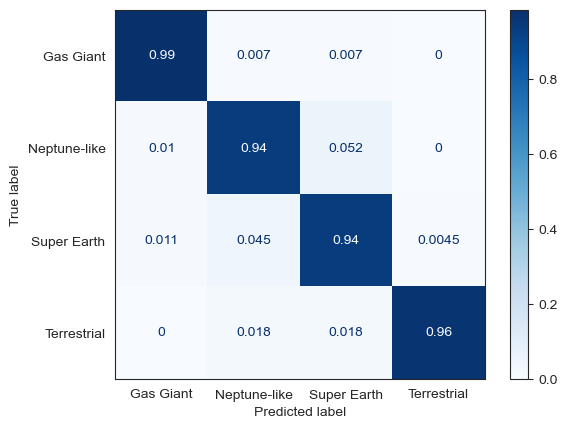

In [65]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, normalize='true', cmap='Blues', 
                                      display_labels = ['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial']); 

Validação cruzada:

In [66]:
skf = StratifiedKFold(shuffle = True, random_state = 42)

resultados = cross_validate(knn, X, y, scoring = 'accuracy', cv = skf, 
                            return_train_score = True)

treino_acc= resultados['train_score']
teste_acc = resultados['test_score']

knn_acc = teste_acc.mean()

print("Média da acurácia no treino:", treino_acc.mean())
print("Média da acurácia no teste:", knn_acc)

Média da acurácia no treino: 0.9603631680458425
Média da acurácia no teste: 0.9485494722547992


#### CatBoost

In [67]:
cat = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 42,
                              eval_metric="Accuracy", verbose = False)

cat.fit(X_train, y_train)

print(f'Acurácia do treino: {cat.score(X_train, y_train)}')
print(f'Acurácia do teste: {cat.score(X_test, y_test)}')

Acurácia do treino: 0.9900990099009901
Acurácia do teste: 0.9825052484254724


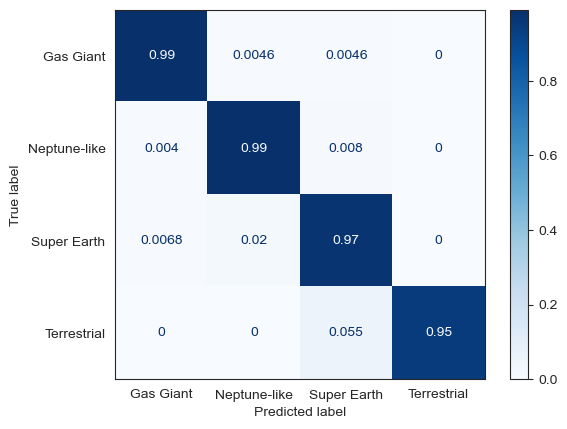

In [68]:
ConfusionMatrixDisplay.from_estimator(cat, X_test, y_test, normalize='true', cmap='Blues', 
                                      display_labels = ['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial']); 

Validação cruzada:

In [69]:
resultados = cross_validate(cat, X, y, scoring = 'accuracy', cv = skf, 
                            return_train_score = True)

treino_acc= resultados['train_score']
teste_acc = resultados['test_score']

cat_acc = teste_acc.mean()

print("Média da acurácia no treino:", treino_acc.mean())
print("Média da acurácia no teste:", cat_acc)

Média da acurácia no treino: 0.9914426737613431
Média da acurácia no teste: 0.9800490710449973


Assim, após a validação cruzada, temos seguintes valores de acurácia para os dados de teste de todos os modelos:

In [70]:
modelos = pd.DataFrame({
    'Modelo': ['Decision Tree Classifier', 'Random Forest Classifier', 
               'Logistic Regression', 'CatBoost', 'XGBoost', 
               'KNN','Adaboost','SVM'],
    'Acurácia': [100*round(dt_acc,4), 
                 100*round(rf_acc,4), 
                 100*round(lr_acc,4), 
                 100*round(cat_acc,4), 
                 100*round(xg_acc,4),
                 100*round(knn_acc,4),
                 100*round(ada_acc,4),
                 100*round(svm_acc,4)]})

modelos.sort_values(by = 'Acurácia', ascending = False, inplace = True)
modelos.reset_index(drop = True, inplace = True)

modelos

,Modelo,Acurácia
0,XGBoost,98.13
1,CatBoost,98.00
2,Logistic Regression,95.61
3,Decision Tree Classifier,94.85
4,KNN,94.85
5,SVM,94.33
6,Random Forest Classifier,90.59
7,Adaboost,76.79


Dois modelos se destacam: XGboost e CatBoost não só pelo valor da acurácia, mas também pelo recall. É importante notar que pelas matrizes de confusão vemos que eles tem uma ótima taxa de acertos para todas as classes. Modelos como Regressão Logística e Random Forest, apesar do bom valor de acurácia, não são bons para identificar a classe de planetas terrestres.

# <font color='red' style='font-size: 30px;'>Otimização de hiperparâmetros</font>
<hr style='border: 2px solid red;'>

Como parte da otimização de hiperparâmetros vou utilizar os dois melhores modelos da seção anterior: XGBoost e CatBoost.

#### XGBoost

In [59]:
pipeline = Pipeline([('scaler', StandardScaler()), ('xgb', xgb.XGBClassifier(objective = 'binary:logistic'))])

param_grid = {
    'xgb__max_depth' : [3, 6, 8],
    'xgb__learning_rate' : [0.3, 0.5, 0.6],
    'xgb__subsample' : [0.5, 0.8, 1],
    'xgb__colsample_bytree' : [0.6, 1]
}

skf = StratifiedKFold(shuffle = True, random_state = 42)

grid = GridSearchCV(pipeline, param_grid, scoring = 'accuracy', n_jobs = -1, cv = skf, verbose = 1)

grid.fit(X, y)

print(f'Os melhores parâmetros são: {grid.best_params_}')
print(f'A acurácia é : {grid.best_score_}')

xg_otimizado = grid.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Os melhores parâmetros são: {'xgb__colsample_bytree': 1, 'xgb__learning_rate': 0.6, 'xgb__max_depth': 6, 'xgb__subsample': 1}
A acurácia é : 0.9825691976685743


Realizando a validação cruzada para o melhor modelo:

In [60]:
resultados = cross_validate(xg_otimizado, X, y, scoring = 'accuracy', cv = skf, 
                            return_train_score = True)
treino_acc= resultados['train_score']
teste_acc = resultados['test_score']

xg_otimizado_acc = teste_acc.mean()

print("Média da acurácia no treino:", treino_acc.mean())
print("Média da acurácia no teste:", xg_otimizado_acc)

Média da acurácia no treino: 1.0
Média da acurácia no teste: 0.9825691976685743


Após a validação cruzada obtemos o XGBoost otimizado com 98.25%. Em comparação com a seção anterior, após a validação cruzada, obtivemos 98.13%.

#### CatBoost

In [61]:
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('cat', CatBoostClassifier(task_type = 'CPU', 
                                                random_state = 42,
                                                verbose = False)
)])

param_grid = {
    'cat__iterations' : [800, 1000, 1200],
    'cat__learning_rate' : [0.01, 0.03, 0.06],
    'cat__depth' : [3, 6, 8],
    'cat__l2_leaf_reg': [1, 3, 5]
}

skf = StratifiedKFold(shuffle = True, random_state = 42)

grid = GridSearchCV(pipeline, param_grid, scoring = 'accuracy', n_jobs = -1, cv = skf, verbose = 1)

grid.fit(X, y)

print(f'Os melhores parâmetros são: {grid.best_params_}')
print(f'A acurácia é : {grid.best_score_}')

cat_otimizado = grid.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Os melhores parâmetros são: {'cat__depth': 8, 'cat__iterations': 1200, 'cat__l2_leaf_reg': 1, 'cat__learning_rate': 0.06}
A acurácia é : 0.9846691562249245


Realizando a validação cruzada:

In [62]:
resultados = cross_validate(cat_otimizado, X, y, scoring = 'accuracy', cv = skf, 
                            return_train_score = True)
treino_acc= resultados['train_score']
teste_acc = resultados['test_score']

cat_otimizado_acc = teste_acc.mean()

print("Média da acurácia no treino:", treino_acc.mean())
print("Média da acurácia no teste:", cat_otimizado_acc)

Média da acurácia no treino: 1.0
Média da acurácia no teste: 0.9846691562249245


Após a validação cruzada obtemos o CatBoost otimizado com 98.00%. Em comparação com a seção anterior, após a validação cruzada, obtivemos 98.47%.

Assim, vemos que o melhor modelo é o CatBoost otimizado.

In [34]:
modelo = CatBoostClassifier(task_type = 'CPU', 
                            random_state = 42,
                            verbose = False, 
                            depth = 8,
                            iterations = 1200,
                            l2_leaf_reg = 1,
                            learning_rate = 0.06)

Treinando o melhor modelo e fazendo a predição:

In [36]:
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

Vendo a acurácia:

In [44]:
print(f'Acurácia de treino: {modelo.score(X_train, y_train):.2f}')
print(f'Acurácia de teste: {modelo.score(X_test, y_test):.2f}')

Acurácia de treino: 1.00
Acurácia de teste: 0.99


Vendo o relatório das métricas completo:

In [43]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       431
           1       0.98      0.99      0.99       500
           2       0.99      0.98      0.98       443
           3       0.98      0.96      0.97        55

    accuracy                           0.99      1429
   macro avg       0.99      0.98      0.98      1429
weighted avg       0.99      0.99      0.99      1429



# <font color='red' style='font-size: 30px;'>Conclusão</font>
<hr style='border: 2px solid red;'>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'> Neste projeto, foram aplicadas técnicas de machine learning para classificar os tipos de exoplanetas. Após um breve tratamento e análise explorátoria de dados foram escolhidos dois modelos que se destacaram: XGBoost e CatBoost. Após a otimização dos hiperparâmetros via GridSearchCV o modelo que obteve o melhor desempenho foi o CatBoost que após a validação cruzada obteve uma acurácia de 98.47%.